<h4 style="text-align:left;color:#5c5828">Authors </h4>
<h4 style="text-align:left;color:#5c5828">-------------------------------------------</h4>
<h5 style="text-align:left;color:#2d1d40">@ Hamza Dabaghi</h6>
<h5 style="text-align:left;color:#2d1d40">@ Firass Mohammed</h6>
<h5 style="text-align:left;color:#2d1d40">@ Yasmine Lhore</h6>
<h4 style="text-align:left;color:#5c5828">-------------------------------------------</h4>

<br/><br/>

<h2 style="text-align:center;color:#fca103">Importation de Librairies</h2><br/>

In [1]:

# pandas : panel data , pour une facile manipulation des données.
import pandas as pd 

# numpy : numerical python extensions , pour la manipulation de tableaux et les opérations mathématiques.
import numpy as np

# decomposition : Package pour l'analyse en composantes principales de scikit learn.
from sklearn.decomposition import PCA

# preprocessing : package pour centrer et normaliser les données avant d'effectuer l'ACP.
from sklearn.preprocessing import StandardScaler

# matplotlib : pour dessiner des graphiques, des tracés ...
import matplotlib.pyplot as plt


<h2 style="text-align:center;color:#fca103">Importation de données</h2><br/>

In [2]:

# importer les données de notre fichier dataset demo.
demographic_data = pd.read_csv("./demo_dt.csv")

# informations sur les données
demographic_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Etat                                 51 non-null     object 
 1   Population totale                    51 non-null     int64  
 2   Immigration domestique nette         51 non-null     float64
 3   Américains migrants avec l'étranger  51 non-null     float64
 4   Immigration internationale nette     51 non-null     float64
 5   Taux de naissance                    51 non-null     float64
 6   Taux de mortalité                    51 non-null     float64
 7   Pop < 65 ans                         51 non-null     float64
 8   Pop > 65 ans                         51 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 3.7+ KB


<h2 style="text-align:center;color:#fca103">Vérification</h2><br/>

In [3]:

# La méthode Head renvoie les 5 premières lignes de données
print( demographic_data.head() )


         Etat  Population totale  Immigration domestique nette  \
0     Alabama            4464356                         -1.78   
1      Alaska             634892                         -1.72   
2     Arizona            5307331                         14.25   
3    Arkansas            2692090                          0.36   
4  California           34501130                         -2.01   

   Américains migrants avec l'étranger  Immigration internationale nette  \
0                                -0.02                              0.69   
1                                -0.24                              2.09   
2                                -0.03                              4.29   
3                                -0.01                              1.07   
4                                -0.04                              7.88   

   Taux de naissance  Taux de mortalité  Pop < 65 ans  Pop > 65 ans  
0              14.41              10.28        869.21        130.79  
1     

In [4]:

# L'attribut shape renvoie les dimensions de notre demographic_data
print( demographic_data.shape )

# il y a 51 échantillons et 8 variables, (Etat : étiquette )


(51, 9)


<h2 style="text-align:center;color:#fca103">Prétraitement</h2><br/>

In [5]:

# séparation des variables non numériques


# l'index pour les données , inplace(true): modifie le meme objet DataFrame sans créer un autre modifié.
demographic_data.set_index('Etat', inplace=True)
print(  demographic_data.head()  )


            Population totale  Immigration domestique nette  \
Etat                                                          
Alabama               4464356                         -1.78   
Alaska                 634892                         -1.72   
Arizona               5307331                         14.25   
Arkansas              2692090                          0.36   
California           34501130                         -2.01   

            Américains migrants avec l'étranger  \
Etat                                              
Alabama                                   -0.02   
Alaska                                    -0.24   
Arizona                                   -0.03   
Arkansas                                  -0.01   
California                                -0.04   

            Immigration internationale nette  Taux de naissance  \
Etat                                                              
Alabama                                 0.69              14.41   

<h2 style="text-align:center;color:#fca103">Normalisation</h2><br/>

In [6]:

# normalisation et centrage des données
# moyenne =0, variance=1, les échantillons doivent être des lignes sinon vous devez les transposer (demographic_data.T)

scaled_demographic_data = StandardScaler().fit_transform(demographic_data)

# round , 2 chiffres significatifs
print (" moyenne : ", np.round(scaled_demographic_data.mean(), 2))
print (" variance : ", np.round(scaled_demographic_data.std(), 2))


 moyenne :  0.0
 variance :  1.0


<h2 style="text-align:center;color:#fca103">ACP</h2><br/>

In [7]:

# instanciation d'un objet ACP à entraîner avec notre jeu de données , nombre de composantes à garder : 3
pca_var = PCA(n_components=3)
pca=pca_var.fit_transform(scaled_demographic_data)


In [8]:

# explained_variance_ratio_ : les valeurs propres des composantes principale. (valeurs propres)
print ( pca_var.explained_variance_ )

# get_covariance() : calculer les covariances à partir de la matrice de données.
print ( pca_var.get_covariance() )

# explained_variance_ratio_ : array avec les proportions de variance associées aux axes. (combien il porte d'informations)

# les 3 premiers vecteurs propres représentent 77% de l’information disponible , ils seront conservés
print ( pca_var.explained_variance_ratio_[:3].sum() )




[3.68275108 1.56559163 1.11155273]
[[ 1.02574437 -0.0261549   0.10386931  0.58729012  0.20996918 -0.13218179
   0.04130905 -0.04130905]
 [-0.0261549   1.01246026  0.02346026  0.21069361 -0.08880453 -0.24403555
   0.10148339 -0.10148339]
 [ 0.10386931  0.02346026  0.7038134  -0.01977714 -0.37873991  0.41684676
  -0.50183552  0.50183552]
 [ 0.58729012  0.21069361 -0.01977714  1.0070786   0.30796346 -0.37251866
   0.26393069 -0.26393069]
 [ 0.20996918 -0.08880453 -0.37873991  0.30796346  0.94640889 -0.57097141
   0.64118387 -0.64118387]
 [-0.13218179 -0.24403555  0.41684676 -0.37251866 -0.57097141  1.09650185
  -0.75123848  0.75123848]
 [ 0.04130905  0.10148339 -0.50183552  0.26393069  0.64118387 -0.75123848
   1.18399632 -0.82397541]
 [-0.04130905 -0.10148339  0.50183552 -0.26393069 -0.64118387  0.75123848
  -0.82397541  1.18399632]]
0.7793989503809176


<h2 style="text-align:center;color:#fca103">Graphiques des valeurs propres</h2><br/>

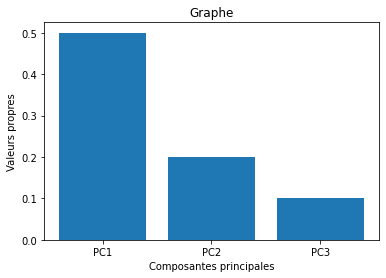

In [9]:
# les valeurs propres
per_var = np.round(pca_var.explained_variance_ratio_,decimals=1)

# création des étiquettes pour les composantes principales
labels = ['PC' + str(x) for x in range( 1 , len(per_var) +1 ) ]

# création du graphe
plt.bar( x=range( 1,len(per_var)+1 ), height=per_var, tick_label=labels)
plt.ylabel('Valeurs propres')
plt.xlabel('Composantes principales')
plt.title('Graphe')
plt.show()




<h2 style="text-align:center;color:#fca103">Étiquetage et renommage des composantes</h2><br/>


In [10]:

pca = pd.DataFrame(pca[:, :3], index=demographic_data.index)
pca.rename(columns={0:'c1',1:'c2',2:'c3'}, inplace=True)


In [11]:

# on voit que les 3 vecteurs sont orthogonaux
np.round(pca.corr(), 2)


,c1,c2,c3
c1,1.0,-0.0,-0.0
c2,-0.0,1.0,-0.0
c3,-0.0,-0.0,1.0


<h2 style="text-align:center;color:#fca103">Interprétation des composantes</h2><br/>

<h5 style="text-align:left;color:#fca103">Composante une</h5><br/>


In [12]:
# copier les 3 composantes dans la variable vects
vects = pca_var.components_[:3]

# pd.Series : Tableau unidimensionnel avec des étiquettes d'axe
one = pd.Series(vects[0], index=demographic_data.columns)
one.sort_values(ascending=False)

# ces valeurs representent la contribution des variables initiale à la construction des composantes principales

Pop < 65 ans                           0.487739
Taux de naissance                      0.396280
Immigration internationale nette       0.239104
Population totale                      0.110760
Immigration domestique nette           0.081578
Américains migrants avec l'étranger   -0.276615
Taux de mortalité                     -0.463222
Pop > 65 ans                          -0.487739
dtype: float64

<h5 style="text-align:left;color:#fca103">Composante deux</h5><br/>

In [13]:
two = pd.Series(vects[1], index=demographic_data.columns)
two.sort_values(ascending=False)

Population totale                      0.688430
Immigration internationale nette       0.614344
Américains migrants avec l'étranger    0.265998
Pop > 65 ans                           0.166779
Immigration domestique nette           0.149021
Taux de naissance                      0.006400
Taux de mortalité                      0.003385
Pop < 65 ans                          -0.166779
dtype: float64

<h5 style="text-align:left;color:#fca103">Composante trois</h5><br/>

In [14]:
three = pd.Series(vects[2], index=demographic_data.columns)
three.sort_values(ascending=False)

Immigration domestique nette           0.896158
Américains migrants avec l'étranger    0.075209
Immigration internationale nette       0.052728
Pop > 65 ans                           0.001130
Pop < 65 ans                          -0.001130
Taux de mortalité                     -0.176813
Population totale                     -0.267053
Taux de naissance                     -0.293056
dtype: float64